<a href="https://colab.research.google.com/github/marceloaraya7/PROYECTO/blob/main/Optimizando_el_Aprendizaje_Predicci%C3%B3n_del_Rendimiento_en_Ingl%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Optimizando el Aprendizaje: Predicción del Rendimiento en Inglés**

## **Objetivo**

Identificar patrones tempranos que permitan orientar intervenciones pedagógicas y reducir la brecha de aprendizaje hacia 4º medio donde deben realizar los examenes internacionales de Inglés FCE o CAE. A partir de un conjunto de datos reales, se entrena un modelo de clasificación que busca predecir el nivel, evaluando tanto su precisión como la importancia relativa de cada habilidad en la predicción.

## **Introducción**

Este trabajo explora el uso de modelos de aprendizaje automático para predecir el nivel de inglés de estudiantes de 1º medio del Colegio Puerto Varas, a partir de sus puntajes en las habilidades de lectura, escritura, comprensión auditiva y expresión oral del examen PET.

Lo primero será importar las librerías necesarias para entrenar el modelo. Hacemos uso de librerías clásicas de Python para el procesamiento y visualización de los datos y el reporte de clasificación, además de las herramientas de Machine Learning que ofrece la librería scikit-learn.

In [1]:
# Paso 1: Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

## **Descripción conjunto de datos**

Luego, procedemos a cargar los datos con los que contamos. Se tratan de los resultados de una prueba de evaluación de inglés aplicada a estudiantes de primero medio del Colegio Puerto Varas. Este paso podría realizarse cargando un archivo .csv desde alguna fuente externa, pero en este caso se genera el .csv con la data ya que son pocos casos.

Cada fila representa a un estudiante, con estas variables:

**Reading**: Comprensión lectora

**Writing**: Producción escrita

**Listening**: Comprensión auditiva

**Speaking**: Expresión oral

**Overall Score**: Puntaje global (promedio o total)

**Grade**: Nivel de inglés (A2, B1, B2, C)

La variable objetivo para la clasificación es Grade, que indica el resultado final. Overall Score corresponde a la puntuación general, y tiene una relación directa con Grade.

In [2]:
# Paso 2: Cargar datos desde CSV
from io import StringIO

data_csv = """
Apellido,Nombre,Reading,Writing,Listening,Speaking,Overall Score,Grade
Román,Baltazar,143,151,138,152,146,C
Moya,Alonso,133,151,126,151,140,B1
Río,Borja,113,145,122,146,137,A2
Siade,Andrés,124,141,131,150,137,A2
Fuentes,Benjamín,131,143,138,147,140,B1
Gaete,Carlos,120,137,136,146,135,A2
Petersen,Diego,140,151,136,146,143,B1
Guesalaga,Catalina,170,150,163,163,162,B2
Delgado,Felipe,170,156,170,161,164,B2
Gilardoni,Enzo,134,151,136,140,140,B1
Lazo,Florencio,170,156,163,170,165,B2
Correa,Francisco,170,143,163,153,157,B1
Vyhmeister,Ian,138,145,136,144,141,B1
Sánchez,Gabriel,151,148,170,152,155,B1
Marín,Francisca,148,151,150,158,152,B1
Infante,Ignacia,170,148,170,170,165,B2
Martínez,José María,170,155,158,148,158,B1
Mac Donald,Josefina,134,150,138,151,143,B1
Valderrama,Juan Diego,145,148,163,151,152,B1
Reyes,José Pedro,109,145,124,138,129,A2
Sandoval,Juanita,129,151,143,152,144,B1
Valdés,León,134,148,136,148,142,B1
Carrera,Leonor,118,146,116,147,132,A2
"""

df = pd.read_csv(StringIO(data_csv))

Se puede apreciar a simple vista que entre los valores de Grade contamos con tan solo un caso en que el valor es C. Esto es problemático, pues no nos permitirá hacer una separación del dataset entre entrenamiento y prueba para esta clase, por lo que es mejor retirarla.

In [ ]:
# Paso 3: Eliminar la clase con solo un ejemplo ('C')
df = df[df['Grade'] != 'C']

Definimos la variable Grade como la variable objetivo. Esta se transforma en valores numéricos mediante LabelEncoder, ya que los modelos de ML trabajan con números.

Además, dejamos fuera Overall Score. Su relación con Grade es casi directa (si no se usa para definir Grade, probablemente se correlaciona fuertemente con ella). Incluir Overall Score puede hacer que el modelo aprenda a predecir el nivel solo con ese valor, ignorando las habilidades individuales. Esto reduce la capacidad del modelo de identificar qué habilidades necesitan ser reforzadas para mejorar el nivel, haciendo que sea pedagógicamente poco útil su incorporación en el modelo.

In [1]:
# Paso 4: Preprocesamiento
X = df[['Reading', 'Writing', 'Listening', 'Speaking']]
y = df['Grade']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

NameError: name 'df' is not defined

## **Metodos y Modelos**

Generamos la partición entre entrenamiento y prueba (con una proporción de 80/20), y se utiliza estratificación, lo que asegura que la proporción de niveles de inglés se mantenga en ambas divisiones. La estratificación es importante para asegurarnos de que haya representación de las distintas clases en ambos conjuntos.

In [ ]:
# Paso 5: División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Entrenamos el modelo utilizando Random Forest Classifier (modelo de árbol de decisión con múltiples árboles). Este modelo funciona bien cuando contamos con pocos datos.

In [3]:
# Paso 6: Entrenamiento
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

## **Rendimiento del modelo**

Se usa el modelo para predecir los niveles de inglés en el conjunto de prueba. Luego, se genera un reporte de clasificación con métricas como precisión (accuracy), recall, y F1-score para cada clase. Finalmente, se muestra una matriz de confusión, que indica cuántos estudiantes fueron clasificados correctamente o incorrectamente.

Reporte de Clasificación:
              precision    recall  f1-score   support

          A2       1.00      1.00      1.00         1
          B1       1.00      1.00      1.00         3
          B2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



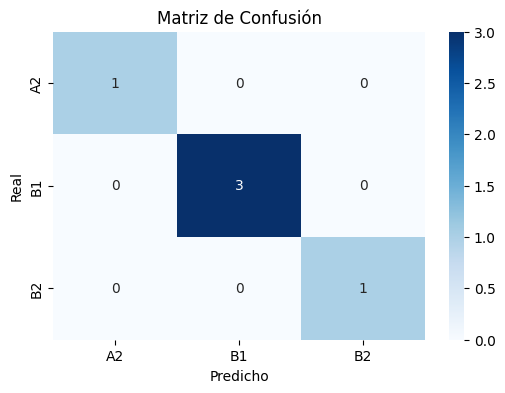

In [ ]:
# Paso 7: Evaluación
y_pred = model.predict(X_test)

# Clases presentes
labels_presentes = unique_labels(y_test, y_pred)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, labels=labels_presentes,
                            target_names=le.inverse_transform(labels_presentes)))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=le.inverse_transform(labels_presentes),
            yticklabels=le.inverse_transform(labels_presentes),
            cmap="Blues")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

## **Interpretación de resultados**

Se observa que el modelo clasificó correctamente los 5 estudiantes del conjunto de prueba, lo que es un excelente resultado inicial.

Ahora bien, son solo 5 casos. Aunque los resultados son perfectos, no es suficiente evidencia estadística de que el modelo funcione igual de bien con nuevos estudiantes. A2 y B2 solo cuentan con un caso en el test, por lo que no es una prueba robusta.

Es casi seguro que estamos en presencia de overfitting, ya que al tener un dataset pequeño, el modelo puede estar “memorizando” los patrones.

Finalmente, se calcula la importancia de cada habilidad en la predicción del nivel de inglés.

Esto permite saber qué habilidades influyen más en determinar el nivel (por ejemplo, si Speaking es más determinante que Reading).

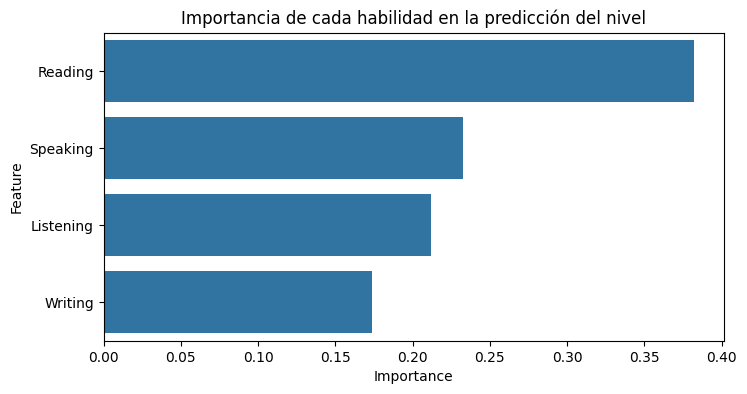

In [ ]:
# Paso 8: Importancia de características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Importancia de cada habilidad en la predicción del nivel')
plt.show()

Podemos ver que el modelo le asigna casi un 40% de importancia total a Reading, lo que sugiere que las diferencias entre niveles A2, B1 y B2 se reflejan fuertemente en esta prueba. Esto se puede deber a una mayor dispersión en puntajes de lectura o ser un indicador base de competencia general.

Speaking y Listening  tienen un peso considerable, lo que indica que también contribuyen bien a distinguir niveles. Dado que son productivas/receptivas en contexto oral, podrían estar reflejando competencia comunicativa funcional.

Finalmente, Writing es la menos influyente. Se puede deber a puntajes más uniformes o que podría no ser tan influyente en la ponderación de la evaluación.

## **Conclusiones**

Los resultados del modelo muestran que la comprensión lectora (Reading) es la habilidad con mayor peso en la predicción del nivel de inglés. Esto sugiere que, para mejorar el nivel general de los estudiantes, puede ser más efectivo enfocar las estrategias pedagógicas en reforzar la lectura, especialmente en los primeros años de enseñanza media.

Además, el modelo permite identificar con mayor claridad qué estudiantes podrían estar en riesgo de no alcanzar el nivel esperado, facilitando intervenciones más focalizadas. Esta información también puede orientar decisiones curriculares, priorizando habilidades que tienen mayor impacto en el logro global.

Sin embargo, este análisis tiene limitaciones metodológicas importantes. El conjunto de datos es pequeño y presenta una distribución desigual entre las clases, lo que puede influir en la estabilidad del modelo.